In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [198]:
path_train = "src/data/train.csv"
path_test = "src/data/test.csv"

train_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:
total_missing_train = train_data.isnull().sum().sort_values(ascending=False)

percent = train_data.isnull().sum()/train_data.isnull().count()*100
percent = (round(percent, 1)).sort_values(ascending=False)

train_missing_data = pd.concat([total_missing_train, percent], axis=1, keys=['Total', '%'])

train_missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [202]:
total_missing_test = test_data.isnull().sum().sort_values(ascending=False)

percent = test_data.isnull().sum()/test_data.isnull().count()*100
percent = (round(percent, 1)).sort_values(ascending=False)

total_missing_data = pd.concat([total_missing_test, percent], axis=1, keys=['Total', '%'])

total_missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


In [203]:
# 1) Extract titles
train_data['Title'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.')

mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs',
           'Rev': 'Mr', 'the Countess': 'Miss'}
train_data.replace({'Title': mapping}, inplace=True)

# 2) Compute counts
title_counts = train_data['Title'].value_counts()

title_counts

Title
Mr        531
Miss      187
Mrs       126
Master     40
Dr          7
Name: count, dtype: int64

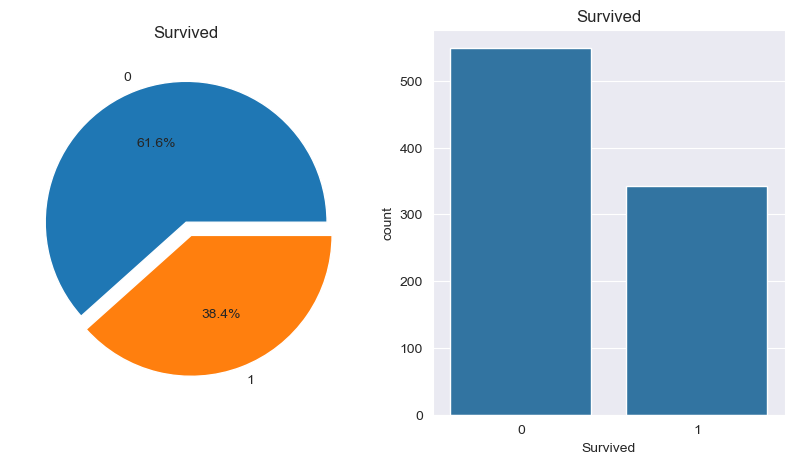

In [204]:
f, ax = plt.subplots(1, 2,figsize=(10, 5))

train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=train_data, ax=ax[1])

ax[1].set_title('Survived')

plt.show()

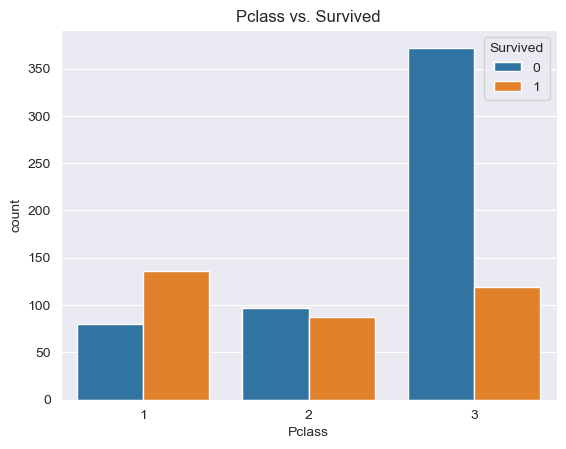

In [205]:
sns.countplot(x='Pclass',hue='Survived', data=train_data)

plt.title('Pclass vs. Survived')
plt.show()

If is in 1st class, more people survived.

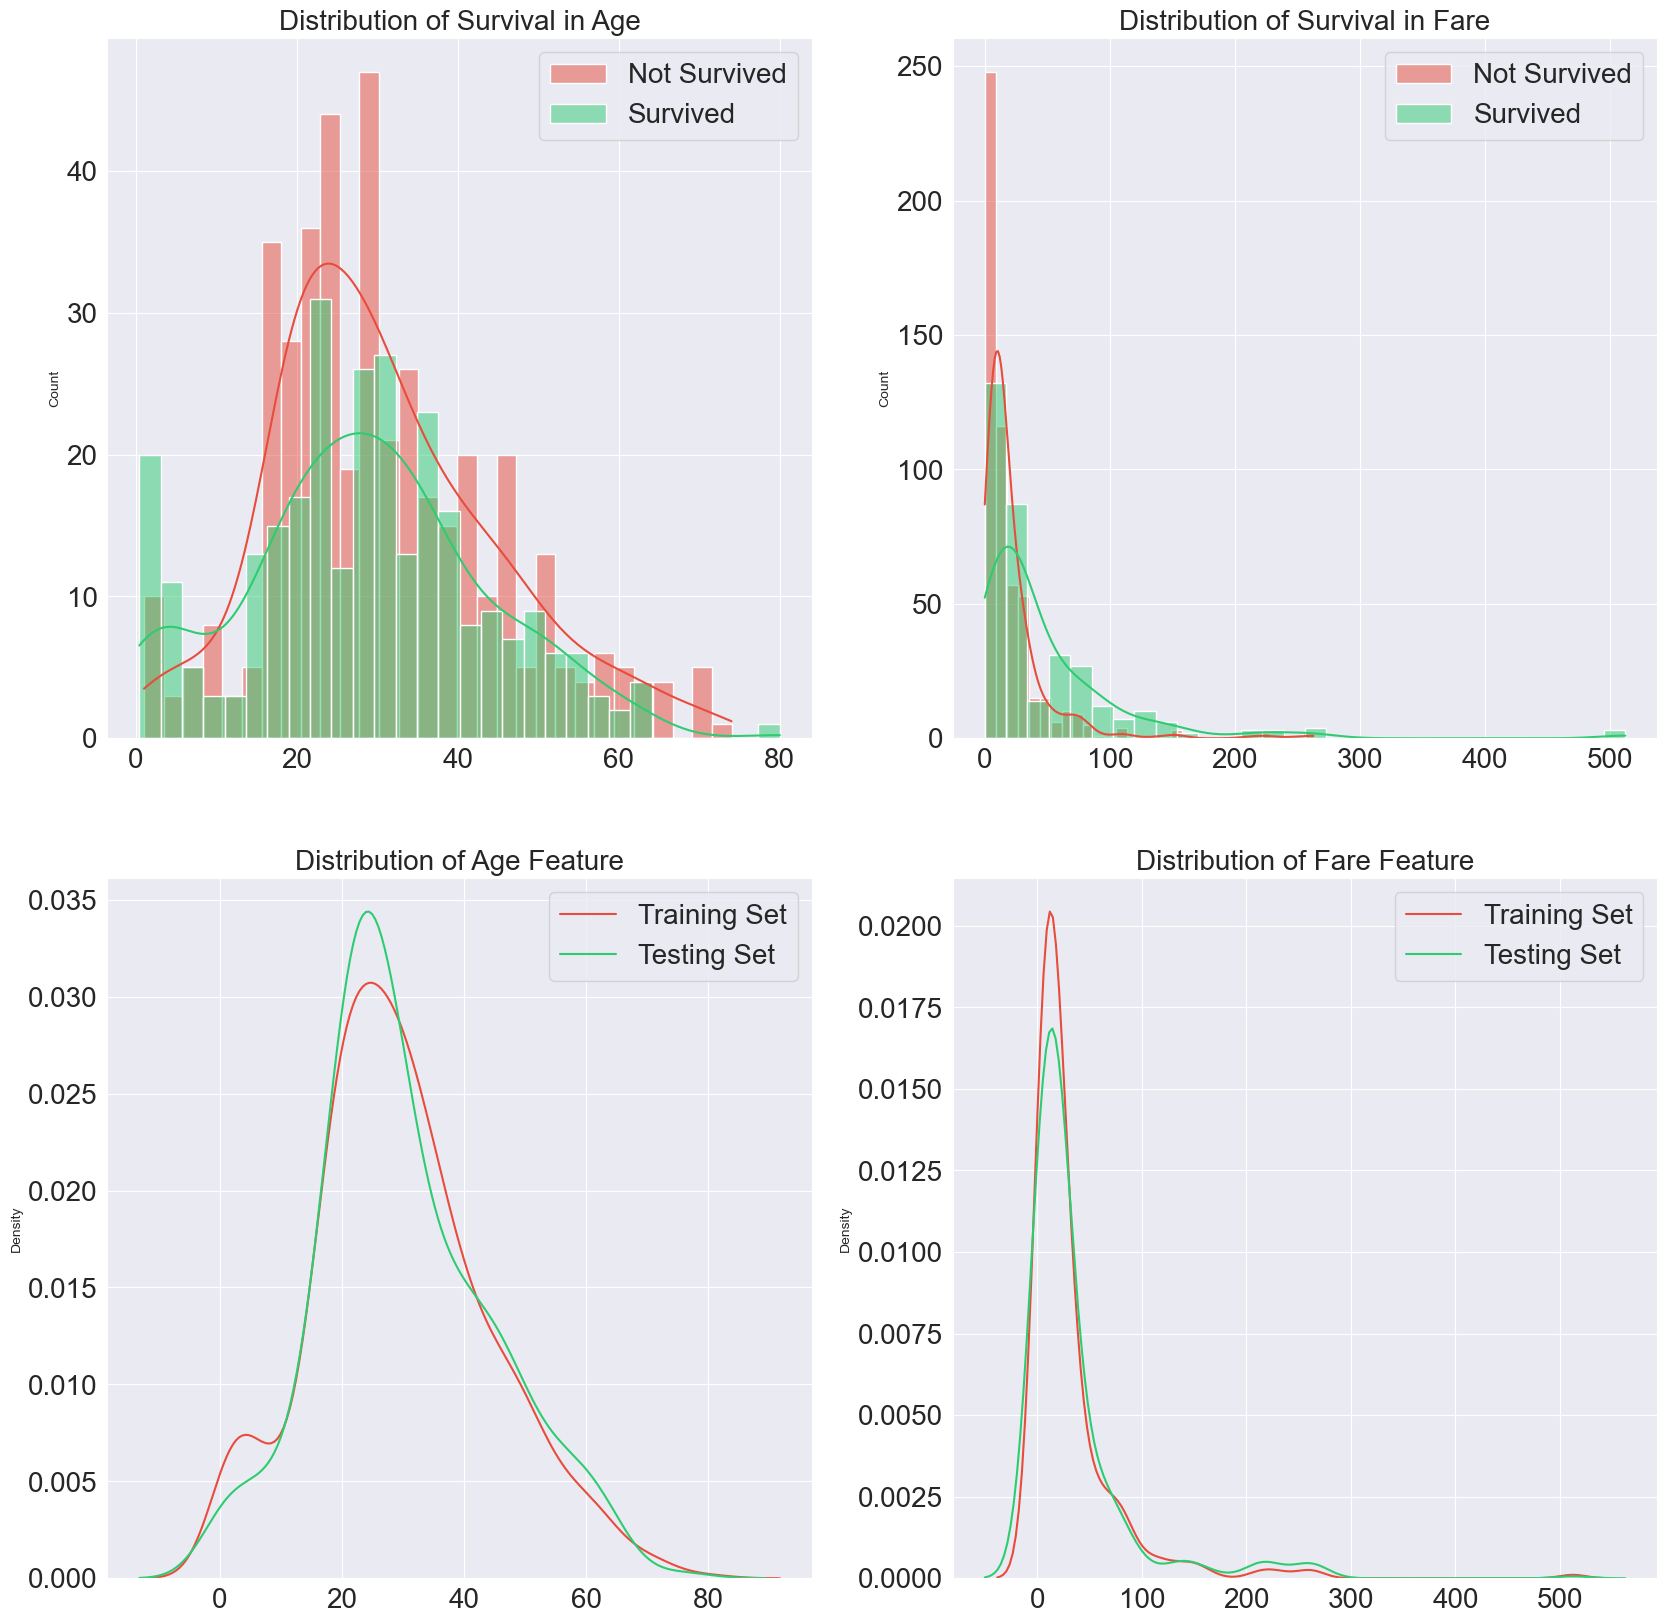

In [206]:
features = ['Age', 'Fare']
target = train_data['Survived']==1

f, ax = plt.subplots(2, 2, figsize=(20, 20))

for i, feature in enumerate(features):
    sns.histplot(data=train_data[~target], x=feature, bins=30, kde=True, color='#e74c3c', label="Not Survived", ax=ax[0, i])
    sns.histplot(data=train_data[target], x=feature, bins=30, kde=True, color='#2ecc71', label="Survived", ax=ax[0, i])

    sns.kdeplot(data=train_data, x=feature, color='#e74c3c', label="Training Set", ax=ax[1, i])
    sns.kdeplot(data=test_data, x=feature, color='#2ecc71', label="Testing Set", ax=ax[1, i])

    ax[0][i].set_xlabel('')
    ax[1][i].set_xlabel('')

    for j in range(2):
        ax[j][i].tick_params(axis='x', labelsize=20)
        ax[j][i].tick_params(axis='y', labelsize=20)

    ax[0][i].legend(loc='upper right', prop={'size': 20})
    ax[1][i].legend(loc='upper right', prop={'size': 20})
    ax[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1)

ax[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1)
ax[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1)

plt.show()


Younger people and High fare are more likely to survive. So probably extract this as new features.

<Axes: xlabel='Pclass', ylabel='Age'>

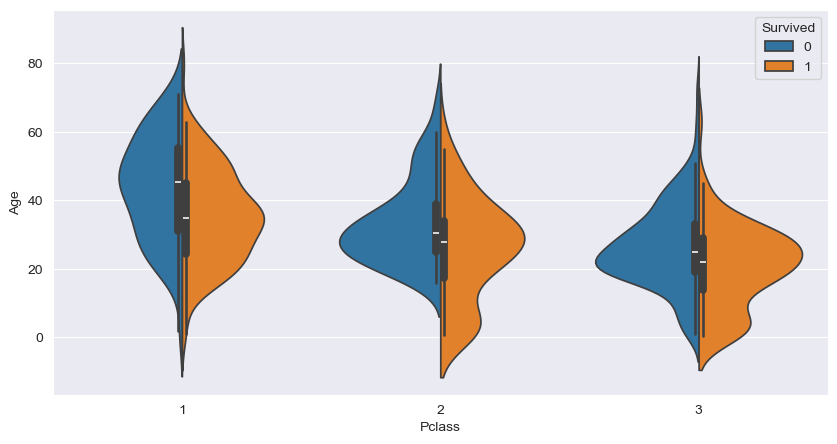

In [207]:
f, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(y='Age', x='Pclass', hue='Survived', data=train_data, split=True, ax=ax)

Children are more likely to survive in both 2nd and 3rd classes.

<Axes: xlabel='Sex', ylabel='Age'>

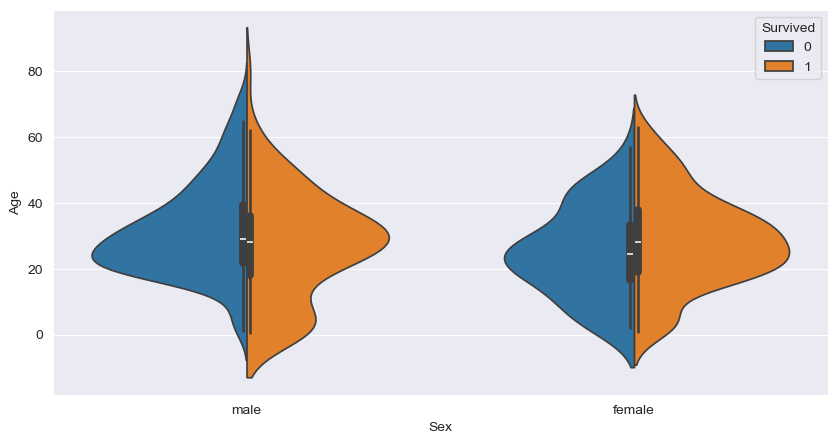

In [208]:
f, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(x='Sex', y='Age', hue='Survived', split=True, data=train_data)

In [209]:
age_group_by_sex_pcalss = train_data.groupby(['Sex','Pclass'])['Age'].median()

for pclass in range(1,4):
    for sex in ['female', 'male']:
        print(f"The median age of {sex} from class {pclass} is: {age_group_by_sex_pcalss[sex][pclass]:.2f}")

# train_data['Age'] = train_data.groupby(['Sex','Pclass'])['Age'].transform(
#     lambda x: x.fillna(x.median())
# )

The median age of female from class 1 is: 35.00
The median age of male from class 1 is: 40.00
The median age of female from class 2 is: 28.00
The median age of male from class 2 is: 30.00
The median age of female from class 3 is: 21.50
The median age of male from class 3 is: 25.00


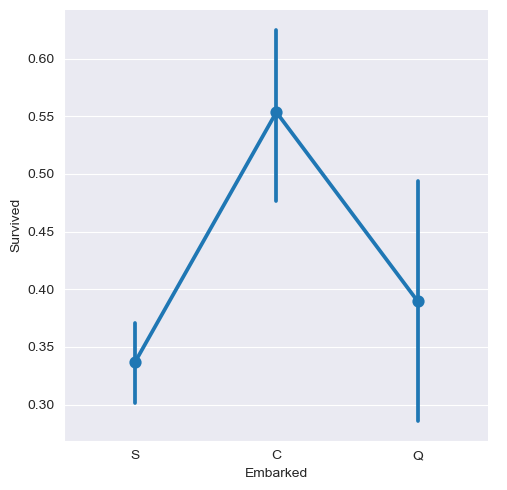

In [210]:
sns.catplot(x='Embarked', y='Survived', kind='point', data=train_data)

plt.show()

In [211]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [212]:
train_data.loc[train_data['Name']=='Icard, Miss. Amelie', 'Embarked'] = 'S'

train_data[train_data['Name']=='Icard, Miss. Amelie']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,Miss


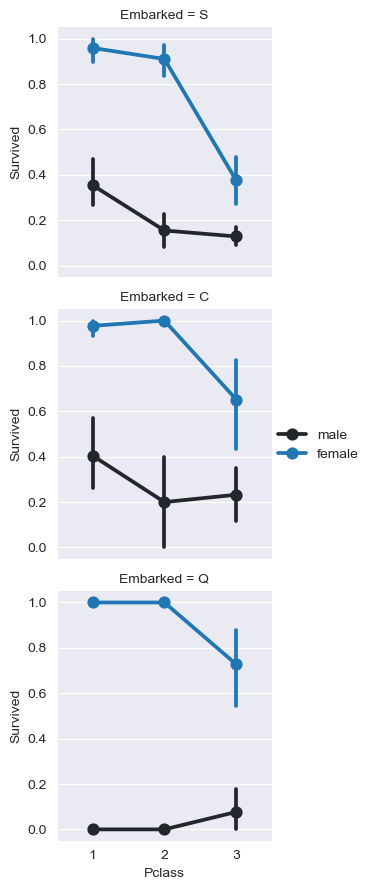

In [213]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked')

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1, 2, 3], hue_order=['male', 'female'], palette='dark:#1f77b4')

FacetGrid.add_legend()

In [214]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [215]:
fare_group_by_pclass_parch_sib = test_data.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].median()

fare_group_by_pclass_parch_sib

Pclass  Parch  SibSp
1       0      0         31.67920
               1         66.22915
               2         38.58960
        1      0         61.67920
               1         93.50000
        2      0        108.82915
               1        101.77500
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         31.50000
        1      0         21.00000
               1         26.00000
               2         31.00000
        2      0         32.50000
               1         53.28960
        3      0         39.00000
3       0      0          7.79580
               1         14.45420
               2         21.67920
               3         18.00000
        1      0         11.38335
               1         15.24580
               3         21.55000
               4         29.12500
        2      0         14

In [216]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

deck_group_by_pclass_deck = (train_data.groupby(['Pclass', 'Deck']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket'], axis=1).rename(
    columns={'Name': 'Count'}))

deck_group_by_pclass_deck

Count  Title
Pclass Deck                 
1      A           15     15
       B           47     47
       C           59     59
       D           29     29
       E           25     25
       T            1      1
       Unknown     40     40
2      D            4      4
       E            4      4
       F            8      8
       Unknown    168    168
3      E            3      3
       F            5      5
       G            4      4
       Unknown    479    479

In [217]:
deck_group_by_pclass_deck=deck_group_by_pclass_deck.transpose()

deck_group_by_pclass_deck

Pclass   1                             2                3              
Deck     A   B   C   D   E  T Unknown  D  E  F Unknown  E  F  G Unknown
Count   15  47  59  29  25  1      40  4  4  8     168  3  5  4     479
Title   15  47  59  29  25  1      40  4  4  8     168  3  5  4     479

In [218]:
decks = deck_group_by_pclass_deck.columns.levels[1]

decks

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Unknown'], dtype='object', name='Deck')

In [219]:
deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'Unknown': {}, 'T': {}}

for pclass in range(1,4):
    for deck in decks:
        try:
            count = deck_group_by_pclass_deck[pclass][deck].iloc[0]
            deck_counts[deck][pclass] = count
        except KeyError:
            deck_counts[deck][pclass] = 0

df_decks = pd.DataFrame(deck_counts)

deck_percentages = {}

for col in df_decks.columns:
    deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

df_decks

,A,B,C,D,E,F,G,Unknown,T
1,15,47,59,29,25,0,0,40,1
2,0,0,0,4,4,8,0,168,0
3,0,0,0,0,3,5,4,479,0


Probably can fill the data up by this info.

In [220]:
df_percentages = pd.DataFrame(deck_percentages)
df_percentages

,A,B,C,D,E,F,G,Unknown,T
0,100.0,100.0,100.0,87.878788,78.125,0.000000,0.0,5.822416,100.0
1,0.0,0.0,0.0,12.121212,12.500,61.538462,0.0,24.454148,0.0
2,0.0,0.0,0.0,0.000000,9.375,38.461538,100.0,69.723435,0.0


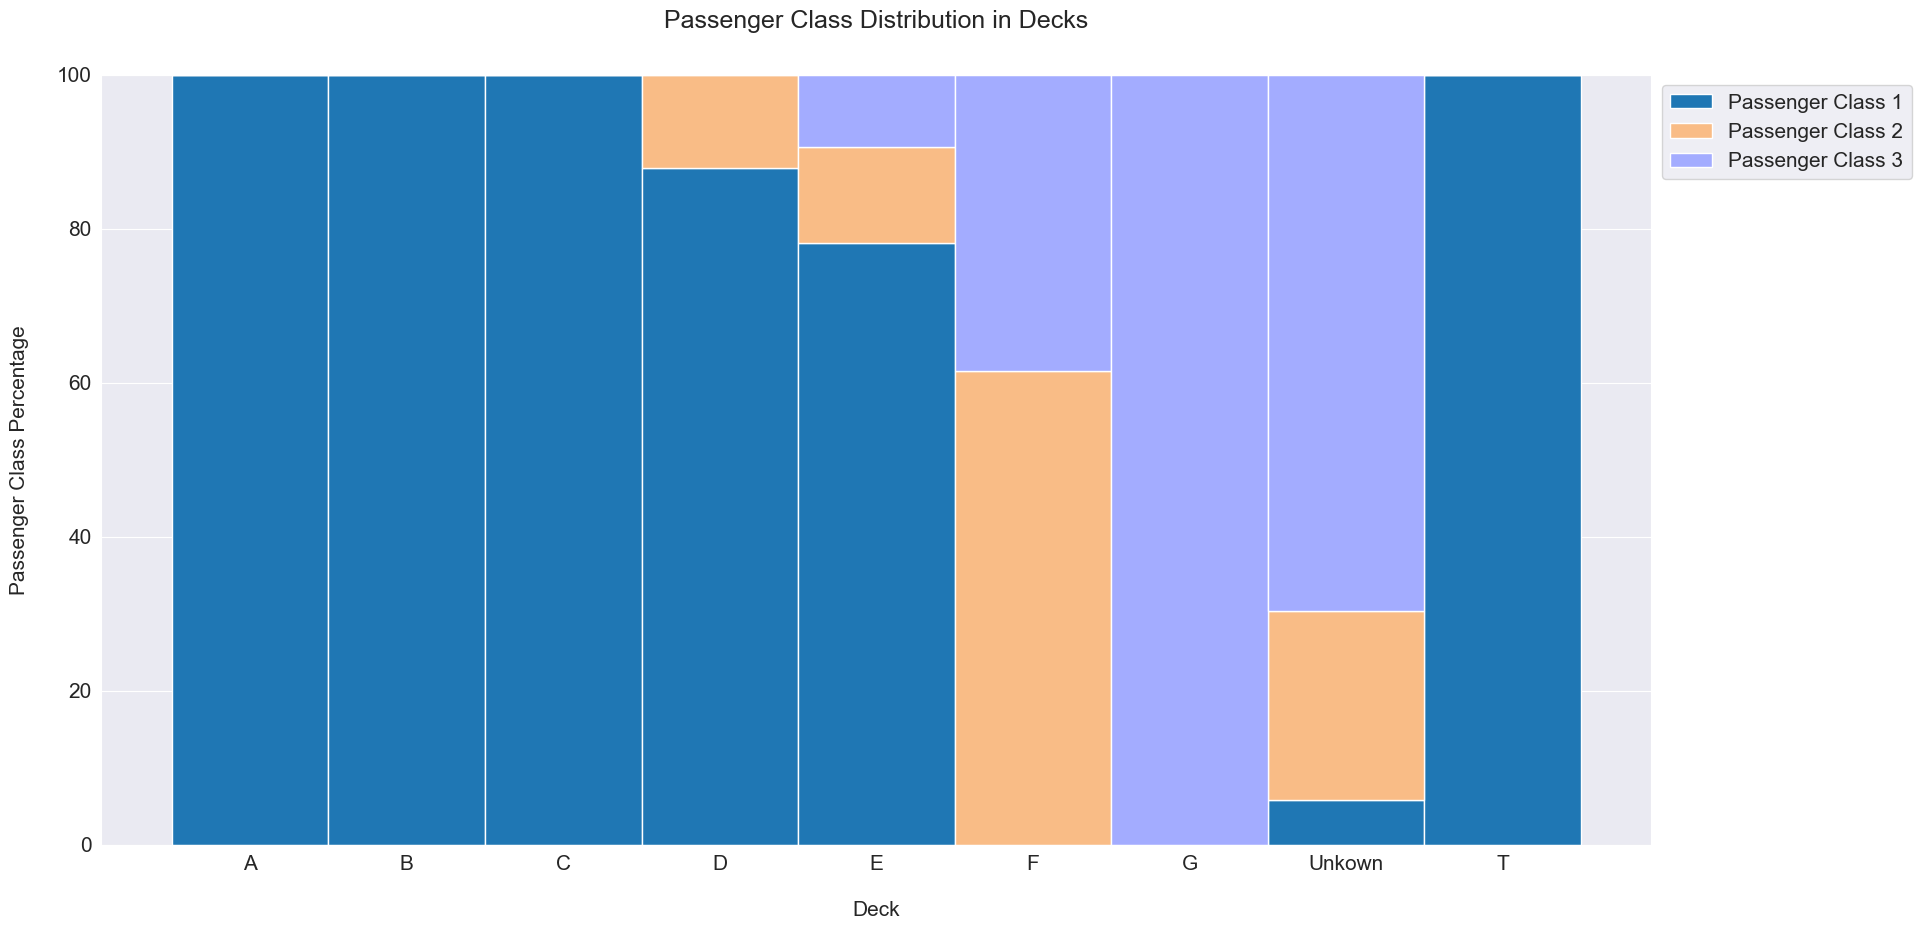

In [221]:
df_percentages = pd.DataFrame(deck_percentages).transpose()
deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unkown', 'T')
bar_count = np.arange(len(deck_names))

pclass1 = df_percentages[0]
pclass2 = df_percentages[1]
pclass3 = df_percentages[2]

bar_width = 1
plt.figure(figsize=(20, 10))

plt.bar(bar_count, pclass1, width=bar_width,edgecolor='white',label='Passenger Class 1')
plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

plt.xlabel('Deck', size=15, labelpad=20)
plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
plt.xticks(bar_count, deck_names)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(loc='best',bbox_to_anchor=(1, 1),prop={'size': 15})
plt.title('Passenger Class Distribution in Decks',size=18, y=1.05)

plt.show()

Dividing to three groups: ABC; DE; FG (There is only one person in Cabin T and he is a first class passenger, so I put it into the same group with ABC).